## Lecture 11

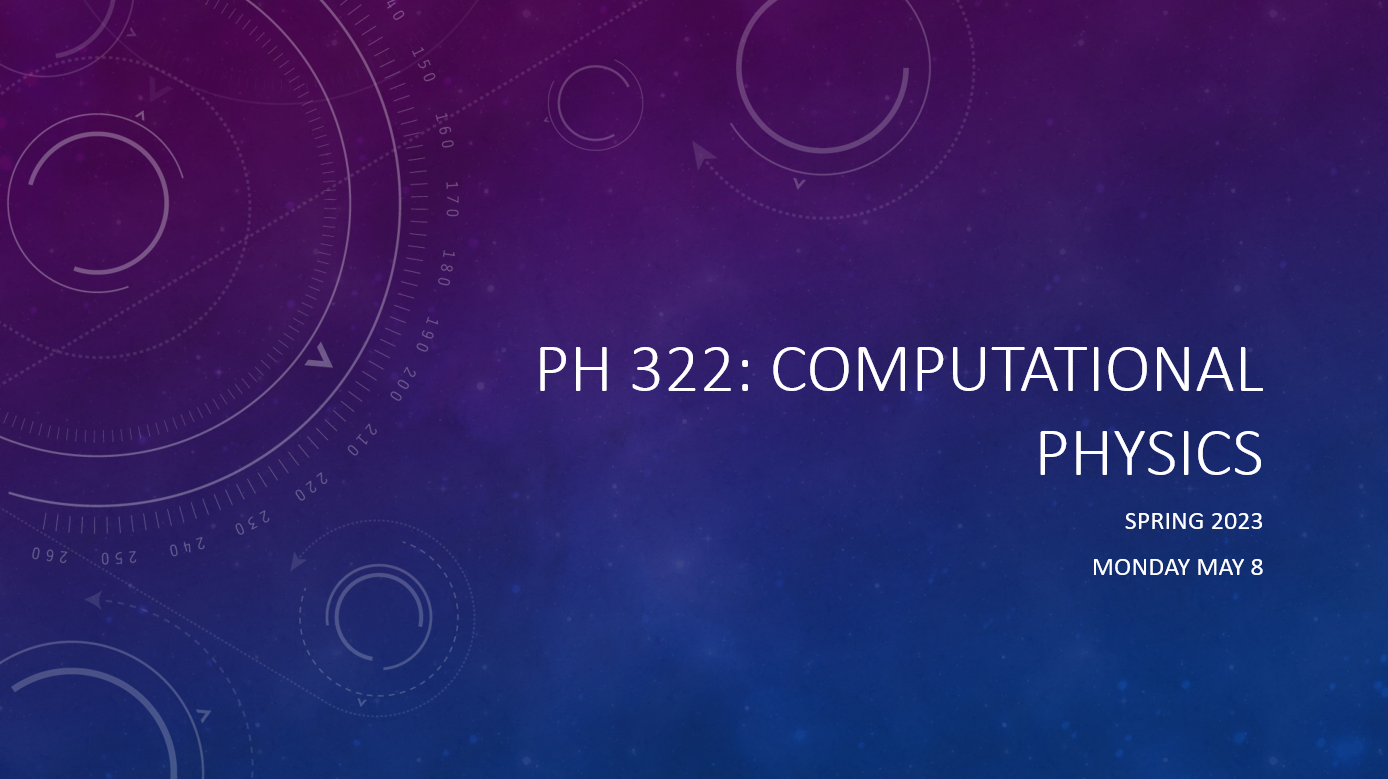

* Questions??
* Midterm info
* HW6 available


**Last Class**

* Gaussian elimintation
* Partial Pivoting


**Today**
* LU decomposition
* Eigenvectors and eigenvalues
* QR decomposition
* The relaxation method

### LU decomposition (use for Exercise 6.3)

Gaussian elimination with backsubstition is an efficient process if you have only one system of linear of equations to solve. But there are times when we have numerous systems with the same $\mathbf{A}$ but different $\mathbf{v}$.  In this case it would be nice not to have to repeat Gaussian elimination on $\mathbf{A}$. 

This is where LU decomposition comes in. LU decomposition involves decomposing $\mathbf{A}$ into lower and upper triangular matrices, then using those new matrices to solve for $\mathbf{x}$ for any vector $\mathbf{v}$.

We will first do the decomposition of $\mathbf{A}$ into $\mathbf{L}$ and $\mathbf{U}$, then use substitution (both back and forward) to solve for $\mathbf{x}$.

The basic idea of the decomposition is that we "preserve" the steps we use to transform $\mathbf{A}$ into an upper triangular matrix $\mathbf{U}$, in a new matrix $\mathbf{L}$. 

Let's see how this works.

We start with $\mathbf{A}$ written as:

$
\begin{bmatrix}
A_{00}&A_{01}&A_{02} \\
A_{10}&A_{11}&A_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
$

We will again transform this to upper triangular, but we will record the steps in a second matrix. For example, the first step is to divide the first row by the first element $A_00$. We can write this in terms of a matrix operation:

$
\begin{bmatrix}
1/A_{00}&0&0 \\
0&1&0 \\
0&0&1 \\
\end{bmatrix}
\begin{bmatrix}
A_{00}&A_{01}&A_{02} \\
A_{10}&A_{11}&A_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&B_{01}&B_{02} \\
A_{10}&A_{11}&A_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
$


Notice when we multipy $\mathbf{A}$ by the matrix on the left we get the matrix on the right. In this way we can "store" this operation in the left matrix.

The next step is to multipy the first row by $-A_{10}$ and add to the second row. We will again "store" this operation in the left matrix, which now looks like this:

$
\begin{bmatrix}
1/A_{00}&0&0 \\
-A_{10}/A_{00}&1&0 \\
0&0&1 \\
\end{bmatrix}
\begin{bmatrix}
A_{00}&A_{01}&A_{02} \\
A_{10}&A_{11}&A_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&B_{01}&B_{02} \\
0&B_{11}&B_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
$

And likewise for the third row:

$
\begin{bmatrix}
1/A_{00}&0&0 \\
-A_{10}/A_{00}&1&0 \\
-A_{20}/A_{00}&0&1 \\
\end{bmatrix}
\begin{bmatrix}
A_{00}&A_{01}&A_{02} \\
A_{10}&A_{11}&A_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&B_{01}&B_{02} \\
0&B_{11}&B_{12} \\
0&B_{21}&B_{22} \\
\end{bmatrix}
$


And now pull out a factor $1/A_{00}$ from the matrix on the left to get:

$
\underbrace{
\frac{1}{A_{00}}
\begin{bmatrix}
1&0&0 \\
-A_{10}&A_{00}&0 \\
-A_{20}&0&A_{00} \\
\end{bmatrix}}_{\mathbf{L}_0}
\begin{bmatrix}
A_{00}&A_{01}&A_{02} \\
A_{10}&A_{11}&A_{12} \\
A_{20}&A_{21}&A_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&B_{01}&B_{02} \\
0&B_{11}&B_{12} \\
0&B_{21}&B_{22} \\
\end{bmatrix}
$

We call the matrix above the underbrace $\mathbf{L}_0$ (including the prefactor) because it is lower triangular (all elements above the diagonal are zero), and we use it to transform column 0 of $\mathbf{A}$ giving us $\mathbf{B}$.  So we can think about these first steps as simply multiplying $\mathbf{A}$ with $\mathbf{L}_0$. 

So now we have the matrix on the right. Again, we perform and store operations in a matrix to transform the second column. We first divide by the second row by $B_{11}$:

$
\begin{bmatrix}
1&0&0 \\
0&1/B_{11}&0 \\
0&0&1 \\
\end{bmatrix}
\begin{bmatrix}
1&B_{01}&B_{02} \\
0&B_{11}&B_{12} \\
0&B_{21}&B_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&C_{01}&C_{02} \\
0&1&C_{12} \\
0&C_{21}&C_{22} \\
\end{bmatrix}
$

and multiply the middle row by $-B_{21}$ and add to third row:

$
\begin{bmatrix}
1&0&0 \\
0&1/B_{11}&0 \\
0&-B_{21}/B_{11}&1 \\
\end{bmatrix}
\begin{bmatrix}
1&B_{01}&B_{02} \\
0&B_{11}&B_{12} \\
0&B_{21}&B_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&C_{01}&C_{02} \\
0&1&C_{12} \\
0&0&C_{22} \\
\end{bmatrix}
$

We factor out $1/B_{11}$:

$
\underbrace{
\frac{1}{B_{11}}
\begin{bmatrix}
B_{11}&0&0 \\
0&1&0 \\
0&-B_{21}&B_{11} \\
\end{bmatrix}}_{\mathbf{L}_1}
\begin{bmatrix}
1&B_{01}&B_{02} \\
0&B_{11}&B_{12} \\
0&B_{21}&B_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&C_{01}&C_{02} \\
0&1&C_{12} \\
0&0&C_{22} \\
\end{bmatrix}
$



Now we define the matrix above the underbrace as $\mathbf{L}_1$ following the same notation as before.  Finally we repeat this process one more time for the third column of $\mathbf{C}$. This time there is just one step, divide that last row by $C_{22}$:

$
\begin{bmatrix}
1&0&0 \\
0&1&0 \\
0&0&1/C_{22} \\
\end{bmatrix}
\begin{bmatrix}
1&C_{01}&C_{02} \\
0&1&C_{12} \\
0&0&C_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&D_{01}&D_{02} \\
0&1&D_{12} \\
0&0&1 \\
\end{bmatrix}
$

and again factor out $1/C_{22}$:

$
\underbrace{
\frac{1}{C_{22}}
\begin{bmatrix}
C_{22}&0&0 \\
0&C_{22}&0 \\
0&0&1 \\
\end{bmatrix}}_{\mathbf{L}_2}
\begin{bmatrix}
1&C_{01}&C_{02} \\
0&1&C_{12} \\
0&0&C_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
1&D_{01}&D_{02} \\
0&1&D_{12} \\
0&0&1 \\
\end{bmatrix}
$


You see we now end up with the upper triangular matrix we want, but now all the steps are stored in $\mathbf{L_0, L_1, L_2}$. What we have done is just Gaussian elimination in matrix form. We can write the entire process as:

$
\mathbf{L}_2\mathbf{L}_1\mathbf{L}_0\mathbf{A}\mathbf{x}=\mathbf{L}_2\mathbf{L}_1\mathbf{L}_0\mathbf{v}
$

If we have sets of equations with the same $\mathbf{A}$ but different $\mathbf{v}$, we only have to  calculate  $\mathbf{L}_2\mathbf{L}_1\mathbf{L}_0\mathbf{v}$, since $\mathbf{L}_2\mathbf{L}_1\mathbf{L}_0\mathbf{A}$ will remain the same. Then use backsubstitution to solve for $\mathbf{x}$.

This method works. We need to calculate the elements of the matrix $\mathbf{L}_2\mathbf{L}_1\mathbf{L}_0$, which will include products of matrix elements from each of the steps in Gaussian elimination. There is a variant of this method that makes it easier to calculate the matrix we need at the end to solve for $\mathbf{x}$. 

### Defining the $\mathbf{L}$ and $\mathbf{U}$ matrices

To do this we define $\mathbf{L}$ to be the product of the inverses of the $\mathbf{L_i}$ matrices:

$
\mathbf{L} = \mathbf{L_0^{-1}}\mathbf{L_1^{-1}}\mathbf{L_2^{-1}} 
$

and

$\mathbf{U} = \mathbf{L_2}\mathbf{L_1}\mathbf{L_0}\mathbf{A}
$

such that when we multiply these together:

$
\mathbf{L}\mathbf{U} = \underbrace{\mathbf{L_0^{-1}}\underbrace{\mathbf{L_1^{-1}}\underbrace{\mathbf{L_2^{-1}}\mathbf{L_2}}_{\mathbf{I}}\mathbf{L_1}}_{\mathbf{I}}\mathbf{L_0}}_{\mathbf{I}}\mathbf{A} = \mathbf{A}
$

Therefore we can write $\mathbf{A}=\mathbf{L}\mathbf{U}$, or in other words, we have decomposed $\mathbf{A}$ into $\mathbf{L}$ and $\mathbf{U}$.

What are $\mathbf{L_0^{-1}}, \mathbf{L_1^{-1}},$ and $\mathbf{L_2^{-1}}$? 

Let's first rewrite $\mathbf{L_0}$, $\mathbf{L_1},$ and $\mathbf{L_2}$:

$$
\mathbf{L_0} =\frac{1}{A_{00}}
\begin{bmatrix}
1&0&0 \\
-A_{10}&A_{00}&0 \\
-A_{20}&0&A_{00} \\
\end{bmatrix} 
\quad
\mathbf{L_1} =
\frac{1}{B_{11}}
\begin{bmatrix}
B_{11}&0&0 \\
0&1&0 \\
0&-B_{21}&B_{11} \\
\end{bmatrix}
\quad
\mathbf{L_2}=\frac{1}{C_{22}}
\begin{bmatrix}
C_{22}&0&0 \\
0&C_{22}&0 \\
0&0&1 \\
\end{bmatrix}
$$

then we can work out the inverse of each is:

$$
\mathbf{L_0^{-1}} =
\begin{bmatrix}
A_{00}&0&0 \\
A_{10}&1&0 \\
A_{20}&0&1 \\
\end{bmatrix} 
\quad
\mathbf{L_1^{-1}} =
\begin{bmatrix}
1&0&0 \\
0&B_{11}&0 \\
0&B_{21}&1 \\
\end{bmatrix}
\quad
\mathbf{L_2^{-1}}=
\begin{bmatrix}
1&0&0 \\
0&1&0 \\
0&0&C_{22} \\
\end{bmatrix}
$$


since for example:

$$
\mathbf{L_0}\mathbf{L_0^{-1}}=
\frac{1}{A_{00}}
\begin{bmatrix}
1&0&0 \\
-A_{10}&A_{00}&0 \\
-A_{20}&0&A_{00} \\
\end{bmatrix}
\begin{bmatrix}
A_{00}&0&0 \\
A_{10}&1&0 \\
A_{20}&0&1 \\
\end{bmatrix}
=
\begin{bmatrix}
1&0&0 \\
0&1&0 \\
0&0&1 \\
\end{bmatrix}
$$

So then:

$
\mathbf{L} = \mathbf{L_0^{-1}}\mathbf{L_1^{-1}}\mathbf{L_2^{-1}}  = 
\begin{bmatrix}
A_{00}&0&0 \\
A_{10}&B_{11}&0 \\
A_{20}&B_{21}&C_{22} \\
\end{bmatrix}
$

You can see that $\mathbf{L}$ too is lower triangular. Also notice that the matrix elements come from matrices we have already calculated, so there are no new terms here. We just need to keep them from previous steps of the Gaussian elimination.

So now we have both $\mathbf{L}$ and $\mathbf{U}$. We now use these to solve for $\mathbf{x}$ for any 
$\mathbf{v}$:

$
\mathbf{L}\mathbf{U}\mathbf{x}=\mathbf{v}
$

or


$
\begin{bmatrix}
l_{00}&0&0 \\
l_{10}&l_{11}&0 \\
l_{20}&l_{21}&l_{22} \\
\end{bmatrix}
\begin{bmatrix}
u_{00}&u_{01}&u_{02} \\
0&u_{11}&u_{22} \\
0&0&u_{22} \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{bmatrix}
=
\begin{bmatrix}
v_0 \\
v_1 \\
v_2 \\
\end{bmatrix}
$

At this point we can't just solve for $\mathbf{x}$ with one backsubstitution like we did before, because $\mathbf{L}$ is now multiplying $\mathbf{U}$. We instead define a new vector $\mathbf{y}$ as shown:

$
\begin{bmatrix}
l_{00}&0&0 \\
l_{10}&l_{11}&0 \\
l_{20}&l_{21}&l_{22} \\
\end{bmatrix}
\underbrace{
\begin{bmatrix}
u_{00}&u_{01}&u_{02} \\
0&u_{11}&u_{22} \\
0&0&u_{22} \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{bmatrix}
}_{\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\end{bmatrix}
}
=
\begin{bmatrix}
v_0 \\
v_1 \\
v_2 \\
\end{bmatrix}
$





$
\begin{bmatrix}
u_{00}&u_{01}&u_{02} \\
0&u_{11}&u_{22} \\
0&0&u_{22} \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\end{bmatrix}
$

, so now:

$
\begin{bmatrix}
l_{00}&0&0 \\
l_{10}&l_{11}&0 \\
l_{20}&l_{21}&l_{22} \\
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\end{bmatrix}
=
\begin{bmatrix}
v_0 \\
v_1 \\
v_2 \\
\end{bmatrix}
$


Why is this helpful?

Notice because $\mathbf{L}$ is triangular we can solve for $\mathbf{y}$ using forward substitution, i.e. the set of equations to solve now is:

$
l_{00}y_0 = v_0
$

$
l_{10}y_0 + l_{11} = v_1
$

$
l_{20}y_0 + l_{21}y_1 + l_{22}y_2 = v_2
$

so we solve the first equation first for $y_0$ then substitute it into the second equation, etc. This is forward substitution since we proceed from the first to the last equation, unlike backsubstitution where we start with the last equation.

And once  we know $\mathbf{y}$, we can use it in 



$
\begin{bmatrix}
u_{00}&u_{01}&u_{02} \\
0&u_{11}&u_{22} \\
0&0&u_{22} \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\end{bmatrix}
$

 to solve for $\mathbf{x}$, which ultimately is what we want to know.

We see then the LU decomposition requires two substitutions, one forward substitution and one backsubstituion,  so it is a little more work than the standard Gaussian elimination with backsubstitution. Because of this there is no reason why you would necessarily use LU decomposition to solve a single set of equations. But again, if you have multiple sets of equations with the same $\mathbf{A}$ but different $\mathbf{v}$, this saves time because you don't have to repeat the Gaussian elimination.


Once you have coded the standard Gaussian elimination technique, it really isn't that much more effort to code LU decomposition. The main addition is that you now need to store matrix terms in $\mathbf{L}$, as you peform the Gaussian elimination. You also need to code in a forward substitution step in the end.

Let's think about the pseudocode we might use to code LU decomposition. We'll start with calculating 
$\mathbf{L}$ and $\mathbf{U}$. Since this is very similar to the standard Gaussian elimination I'm going to start with our pseudocode that we wrote above.

First I will write out each individual step, then we will figure out the *for*-loops to make our algorithm more efficient. If we look back at our equation for $\mathbf{L}$, (also eqn. 6.32 in text). We see that each column in $\mathbf{L}$ is the lower triangular column of $\mathbf{A}$, at each successive step. Therefore we just need to copy these into $\mathbf{L}$ at the beginning of each step.

The following is for a 3x3 $\mathbf{A}$ matrix. 


* Enter values of A into a 2D array of size NxN
* Enter values of V into a 1D array of size N.
* **Copy A[0:N,0] into L[0:N,0]**
* Perform Gaussian elimination (GE) on column A[:,0], v
* **Copy B[1:N,1] into L[1:N,1]**
* Perform GE on column B[:,1], v
* **Copy C[2:N,2] into L[2:N,2]**
* Perform GE on column C[:,1], v
* Matrix D is now matrix U

When we have completed the Gaussian elimination, $\mathbf{D}$ (which is stored in the original array $\mathbf{D}$) now is $\mathbf{U}$ because we have completed all the steps on it. Note we do not need to create $\mathbf{L}_2, \mathbf{L}_1, \mathbf{L}_0$ along the way, all we care about is the end result $\mathbf{L}$. Because of this LU decomposition is rather easy.

I've highlighted the new steps. Notice there are only a couple of lines of new code we need to write. 

Now let's work on the *for*-loop to loop through these steps efficiently.

* Enter values of A into a 2D array of size NxN
* Enter values of V into a 1D array of size N.
* Loop through A, columns i=0:N
    * **Copy column i from A into column i of matrix L, from rows j=i,N**
    * Perform Gaussian elimination (GE) on column A[:,i], v
* **Copy matrix A into matrix U**


 




So we see once we have our code written for Gaussian elimination, it doesn't take much to perform the LU decomposition.

The last piece of code we need to write is to perform the first substitution, which is a forward substitution.  We already have the code to perform the second substitution since this is the same as the backsubstitution in the standard Gaussian elimination.


To complete our $LU$ decomposition code, we need to add in partial pivoting to insure we don't have a 0 along the diagonal. I didn't assign a homework problem that requires LU decomposition with partial pivoting because it's tricky, but see Exercise 6.3c if you're interested.

**The numpy *solve()* function**

The numpy module contains a library of linear algebra functions including one to solve a system of linear equations using LU decomposition as we just did. It is a good way to test your own code.

We can import it using:

```python
from numpy.linalg import solve
```

To use it, just pass it $\mathbf{A}$ and $\mathbf{v}$. It will return $\mathbf{x}$ in a 1D numpy array. Let's use it to solve the system of equations from the beginning of lecture.

In [7]:
# use the numpy function solve to solve a system of linear equations
import numpy as np
#from numpy.linalg import solve

# Enter values of A into a 2D array of size NxN
A = np.array([[2,1,4,1], [3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]],float)
# Enter values of V into a 1D array of size N.
v = np.array([-4,3,9,7], float)

# since A will be transformed, keep a copy of A so we can verify solution at end
Acopy = np.copy(A)
x = np.linalg.solve(A,v)
N = A.shape[0]

# output solution
for i in range(N):
    print("x{} = {:.2f}".format(i,x[i]))
    
    
# verify we get v back using our solution

y = np.dot(Acopy,x)
print("\n A*x  v")
for i in range(N):
    print("{:.2f}  {:.2f}".format(y[i], v[i]))

x0 = 2.00
x1 = -1.00
x2 = -2.00
x3 = 1.00

 A*x  v
-4.00  -4.00
3.00  3.00
9.00  9.00
7.00  7.00


Pretty snazzy. Seems to work. But not nearly as fun as writing your own function. Am I right? Right? Anyone? Ok, well writing your own LU decomposition function builds character. And I guarantee you, you will feel immensely more satisfied writing your own function than simply using solve, albeit, a bit more tired.

### Eigenvalues and eigenvectors

A number of physics problems require us to calculate the eigenvalues and eigenvectors of a matrix. The eigenvectors and eigenvalues of a matrix are defined by this relationship:

$
\mathbf{Av}=\lambda\mathbf{v}
$

where $\mathbf{v}$ is an eigenvector and $\lambda$ is an eigenvalue. If we think of the matrix $\mathbf{A}$ as a linear transformation that we perform on $\mathbf{v}$, then an eigenvector is a vector that remains the same upon transformation except for a scaling or stretching by a scale factor $\lambda$.

Wikipedia has a nice visual demonstration of an eigenvector using the image of the Mona Lisa:

![](https://upload.wikimedia.org/wikipedia/commons/3/3c/Mona_Lisa_eigenvector_grid.png)

The picture on the left shows two vectors pointing to two locations on the image. A transformation is applied the painting (equivalent to multiply vector $\mathbf{v}$ by matrix $\mathbf{A}$). In the right image we see the transformation has rotated the red vector while preserving the direction of the blue vector. In this case the blue vector is an eigenvector of the transformation matrix $\mathbf{A}$ because the rotation did not rotate it (it is okay if the transformation stretched it, that would be the scale factor given by the eigenvalue $\lambda$).

Another way to demonstrate is to multiply a matrix by one of its eigenvectors.

In the next set of cells, I use VPython to draw two vectors, then multiply both vectors by a matrix. This is essentially a linear transformation of the vectors. I then draw the newly transformed vectors and we compare with the original vectors. One of these two vectors is an eigenvector of the matrix, the other one is not.

First we define two vectors g,b. The coordinate axes are silver, the vectors are green and blue.

In [8]:
# First we draw two vectors

import numpy as np
from vpython import canvas, vector, arrow


# draw a 3D set of axes
canvas(width=700,height=400)
arrow(pos=vector(0,0,0), axis=vector(50,0,0), shaftwidth=1, color=vector(1,1,1))
arrow(pos=vector(0,0,0), axis=vector(0,50,0), shaftwidth=1, color=vector(1,1,1))
arrow(pos=vector(0,0,0), axis=vector(0,0,50), shaftwidth=1, color=vector(1,1,1))

# define two vectors
g = np.array([30,30,-10], float)
b = np.array([40,20,-50], float)

# draw the vectors 
arrow(pos=vector(0,0,0), axis=vector(g[0],g[1],g[2]), shaftwidth=1, color=vector(0,1,0))
arrow(pos=vector(0,0,0), axis=vector(b[0],b[1],b[2]), shaftwidth=1, color=vector(0,0.5,1))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next I transform each vector by multiplying it with $\mathbf{A}$, i.e. I perform a linear transformation on each vector. I label the transformed vectors $\mathbf{g_t}$ and $\mathbf{b_t}$:

$
\mathbf{g_t} = \mathbf{A}\mathbf{g}
$

$
\mathbf{b_t} = \mathbf{A}\mathbf{b}
$

In [9]:
# transform  each vector by taking dot product with A using numpy function dot

#define a 3x3 matrix A
A = np.array([[3,2, 4], [2,0,2], [4,2,3]], float)

# transform both vectors
gt = np.dot(A,g)
bt = np.dot(A,b)

# draw the transformed vectors on the same canvas.
arrow(pos=vector(0,0,0), axis=vector(gt[0],gt[1],gt[2]), shaftwidth=1, color=vector(0,1,0))
arrow(pos=vector(0,0,0), axis=vector(bt[0],bt[1],bt[2]), shaftwidth=1, color=vector(0,0.5,1))

After the transformation each vector has changed. Notice however the difference between the transformed green and blue vectors. While the axis of the green vector has changed, the axis of the blue vector hasn't, it's been flipped around but its orientation remains the same. 

We see that the blue vector is an eigenvector of matrix $\mathbf{A}$, while the green vector is not. 

We can determine the eigenvalue of the blue vector by comparing its transformed length with its original length.

In [10]:
print (b)
print (bt)

[ 40.  20. -50.]
[-40. -20.  50.]


We see we can write the transformed vector simply as $-1\mathbf{b}$. So then we could write the total transformation as:

$
\mathbf{Ab}=\lambda\mathbf{b}
$

where $\lambda=-1$ and is the eigenvalue of the eigenvector.

In general an $NxN$ real symmetric matrix will have $N$ eigenvectors and eigenvalues.

The transformation matrix $\mathbf{A}$ we used:

$
A =
\begin{bmatrix}
3&2& 4 \\
2 & 0 & 2 \\
4 & 2 & 3 \\
\end{bmatrix}
$

has three eigenvectors:

$v_1 = [1, -2, 0], v_2 = [4, 2, -5], v_3=[2, 1, 2]
$

We can draw all three and see how they behave under a transformation of $\mathbf{A}$.

First draw the 3 eigenvectors.

In [11]:
# draw a 3D set of axes
canvas(width=700,height=400)
arrow(pos=vector(0,0,0), axis=vector(50,0,0), shaftwidth=1, color=vector(1,1,1))
arrow(pos=vector(0,0,0), axis=vector(0,50,0), shaftwidth=1, color=vector(1,1,1))
arrow(pos=vector(0,0,0), axis=vector(0,0,50), shaftwidth=1, color=vector(1,1,1))

# define two vectors
 
v1 = np.array([10,-20,0], float)
v2 = np.array([40,20,-50], float)
v3 = np.array([20,10,20], float)

# draw the vectors 
arrow(pos=vector(0,0,0), axis=vector(v1[0],v1[1],v1[2]), shaftwidth=1, color=vector(0,1,0))
arrow(pos=vector(0,0,0), axis=vector(v2[0],v2[1],v2[2]), shaftwidth=1, color=vector(0,0.5,1))
arrow(pos=vector(0,0,0), axis=vector(v3[0],v3[1],v3[2]), shaftwidth=1, color=vector(1,0.5,1))

<IPython.core.display.Javascript object>

Now let's transform all of them and replot:

In [12]:
# transform  each vector by taking dot product with A

v1t = np.dot(A,v1)
v2t = np.dot(A,v2)
v3t = np.dot(A,v3)

# draw the transformed vectors on same plot
arrow(pos=vector(0,0,0), axis=vector(v1t[0],v1t[1],v1t[2]), shaftwidth=1, color=vector(0,1,0))
arrow(pos=vector(0,0,0), axis=vector(v2t[0],v2t[1],v2t[2]), shaftwidth=1, color=vector(0,0.5,1))
arrow(pos=vector(0,0,0), axis=vector(v3t[0],v3t[1],v3t[2]), shaftwidth=1, color=vector(1,0.5,1))

We see that all three transformed vectors lie along the same axes as the original vector. They have all been multipled by a constant value, the eigenvalue.

Again we can determine their eigenvalues by comparing the original and transformed vectors:



In [13]:
print(v1,v2,v3)
print(v1t,v2t,v3t)

[ 10. -20.   0.] [ 40.  20. -50.] [20. 10. 20.]
[-10.  20.   0.] [-40. -20.  50.] [160.  80. 160.]


From this we see that $\lambda_1=-1$, $\lambda_2=-1$, and $\lambda_3=8$.

Now that we know a little more about eigenvectors and eigenvalues, we would like to be able to calculate them given a square real symmetric matrix. Enter   the **QR algorithm**.

### QR algorithm

The QR algorithm is one of the most common methods to determine the eigenvalues and eigenvectors of a matrix. It requires us to decompose the matrix $\mathbf{A}$ into an orthogonal matrix $\mathbf{Q}$ and an upper triangular matrix $\mathbf{R}$ such that $\mathbf{A}=QR$. An orthogonal matrix has the property that its transpose is equal to its inverse, or equivalently: 

$
\mathbf{A^TA}=\mathbf{I}
$

where $ \mathbf{A^T}$ is the transpose of $\mathbf{A}$, and $\mathbf{I}$ is the identity matrix:

$
\begin{bmatrix}
1 & 0 & 0 & \ldots \\
0 & 1 & 0 & \ldots \\
0 & 0 & 1 & \ldots \\
\vdots & \vdots & \vdots &\ddots  \\
\end{bmatrix}
$

The transpose is defined such that $\mathbf{A^T_{ij}}=\mathbf{A_{ji}}$. 

This property of an orthogonal matrix exists because the columns of an orthogonal matrix are themselves orthogonal vectors, and when we multiply the matrix by its transpose we are taking the dot product of each vector with all others. Since the vectors are orthogonal the dot product will be zero except when the vector is dotted with itself, where the dot product will be one since the vectors are normalized. 

The decomposition of $\mathbf{A}$ into $\mathbf{Q}$ and $\mathbf{R}$ is similar to what we did earlier when we decomposed $\mathbf{A}$ into $\mathbf{L}$ and $\mathbf{U}$. Once we decompose $\mathbf{A}$ into $\mathbf{Q}$ and $\mathbf{R}$, it is quite easy to determine its eigenvectors and eigenvalues.




To gain some familiarity with the relationship between $\mathbf{A}$ and $\mathbf{Q}$ let, use vpython to visualize the column vectors in each.

Let's work with this 3x3 matrix:

$
\mathbf{A}=
\begin{bmatrix}
1 & 4 & 8 \\
4 & 2 & 3 \\
8 & 3 & 6 \\
\end{bmatrix}
$

Think of the matrix as 3 column vectors, which we visualize below:

In [14]:
from vpython import canvas, arrow, vector
import numpy as np
# draw a 3D set of axes
canvas(width=700,height=400)
arrow(pos=vector(0,0,0), axis=vector(50,0,0), shaftwidth=1, color=vector(1,1,1))
arrow(pos=vector(0,0,0), axis=vector(0,50,0), shaftwidth=1, color=vector(1,1,1))
arrow(pos=vector(0,0,0), axis=vector(0,0,50), shaftwidth=1, color=vector(1,1,1))

# draw the column vectors of A
v1 = np.array([10,40,80], float)
v2 = np.array([40,20,30], float)
v3 = np.array([80,30,60], float)

# draw the vectors 
arrow(pos=vector(0,0,0), axis=vector(v1[0],v1[1],v1[2]), shaftwidth=1, color=vector(0,1,0))
arrow(pos=vector(0,0,0), axis=vector(v2[0],v2[1],v2[2]), shaftwidth=1, color=vector(0,0.5,1))
arrow(pos=vector(0,0,0), axis=vector(v3[0],v3[1],v3[2]), shaftwidth=1, color=vector(1,0.5,1))

<IPython.core.display.Javascript object>

Next we are going to decompose $\mathbf{A}$ into the orthogonal matrix $\mathbf{Q}$ and visualize the column vectors of $\mathbf{Q}$. Note I do not include this code in the lecture notebook because this is a homework problem.

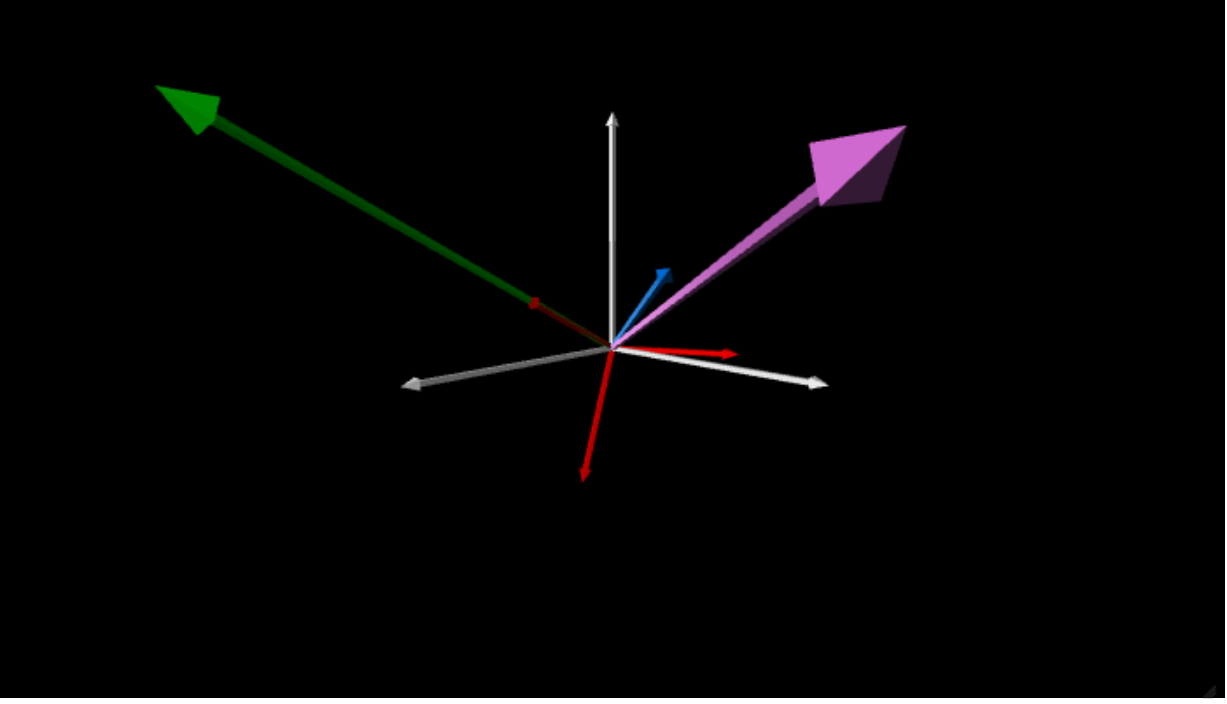

The blue, green, and purple vectors are the column vectors from $\mathbf{A}$ and the red vectors are the column vectors from $\mathbf{Q}$. You can see that the $\mathbf{Q}$ column vectors are orthogonal to one another. The column vectors in $\mathbf{A}$ are linear combinations of the red vectors. Thus we can reconstruct $\mathbf{A}$ from
$\mathbf{Q}$ by multiplying $\mathbf{Q}$ by these linear combinations. This is the information that is stored in $\mathbf{R}$. Thus  $\mathbf{QR}$ is just another way of writing $\mathbf{A}$.

The algorithm to perform the $\mathbf{QR}$ decomposition is in Exercise 6.8, which you will code for homework. For now we will assume we have $\mathbf{Q}$ and $\mathbf{R}$.

**Determining the eigenvectors and eigenvalues from $\mathbf{Q}$ and $\mathbf{R}$.**

To get the eigenvectors and eigenvalues from $\mathbf{Q}$ and $\mathbf{R}$ is relatively easy. It involves repeating the same steps over and over until the solution converges. Each step involves decomposing  $\mathbf{A}$ into $\mathbf{Q}$ and $\mathbf{R}$, recalculating $\mathbf{A}$, and keeping a running product of $\mathbf{Q}$ from each step. Eventually the $\mathbf{A}$ turns into a diagonalized matrix that holds the eigenvalues along the diagonals and the product of $\mathbf{Q}$'s holds the eigenvectors.

Step 1:
We first decompose $\mathbf{A}$ into $\mathbf{Q}$ and $\mathbf{R}$:

$
\mathbf{A} = \mathbf{Q_1} \mathbf{R_1}
$

The index 1 refers to the first step.

Step 2:

We then multiply both sides by $\mathbf{Q_1^T}$:

$
\mathbf{Q_1^T}\mathbf{A} = \mathbf{Q_1^T}\mathbf{Q_1} \mathbf{R_1}
$

However since $\mathbf{Q_1^T}\mathbf{Q_1}=\mathbf{I}$, we can write this as:

$
\mathbf{Q_1^T}\mathbf{A} = \mathbf{R_1}
$

Step 3

We now define a new matrix:

$
\mathbf{A_1} = \mathbf{R_1} \mathbf{Q_1}
$

But from above we see that $\mathbf{R_1} = \mathbf{Q_1^T}\mathbf{A}$, so we can write:

$
\mathbf{A_1} = \mathbf{Q_1^T}\mathbf{A} \mathbf{Q_1}
$

We now repeat steps 1-3 with the matrix $\mathbf{A_1}$.

We decompose $\mathbf{A_1}$ into $\mathbf{Q_2}$ and $\mathbf{R_2}$:

$
\mathbf{A_1} = \mathbf{Q_2}\mathbf{R_2}
$

Multiply both sides by $\mathbf{Q_2^T}$:


$
\mathbf{Q_2^T}\mathbf{A_1} = \mathbf{Q_2^T}\mathbf{Q_2}\mathbf{R_2}
$

or:

$
\mathbf{Q_2^T}\mathbf{A_1} = \mathbf{R_2}
$

Define:

$
\mathbf{A_2} = \mathbf{R_2} \mathbf{Q_2}
$

which we rewrite as:

$
\mathbf{A_2} = \mathbf{Q_2^T}\mathbf{A_1} \mathbf{Q_2}
$

and substituting in $\mathbf{A_1}$ from above:

$
\mathbf{A_2} = \mathbf{Q_2^T} \mathbf{Q_1^T}\mathbf{A} \mathbf{Q_1} \mathbf{Q_2}
$

Each successive step $k$ we multiply $\mathbf{A}$ on the left by $\mathbf{Q_k^T}$ and on the right by $\mathbf{Q_k}$, so we can write the $kth$ step :

$
\mathbf{A_k} = \underbrace{\mathbf{Q_k^T} \ldots \mathbf{Q_2^T}\mathbf{Q_1^T}}_{\mathbf{V^T}}\mathbf{A} \underbrace{\mathbf{Q_1} \mathbf{Q_2}\ldots\mathbf{Q_k}}_{\mathbf{V}}
$


As we continue iterating, we find that $\mathbf{A_k}$ becomes diagonalized, that is all of its offdiagonal elements converge to 0. At this step let's call  $\mathbf{A_k}$, the diagonal matrix $\mathbf{D}$. We will also define the product of $\mathbf{Q}$ matrices, $\mathbf{V}$. With these definitions we write the last step as:

$
\mathbf{D} = \mathbf{V^T}\mathbf{A} \mathbf{V}
$

If we now multiply both sides by $\mathbf{V}$:

$
\mathbf{V}\mathbf{D} = \mathbf{V}\mathbf{V^T}\mathbf{A} \mathbf{V}
$

or:

$
\mathbf{V}\mathbf{D} = \mathbf{A} \mathbf{V}
$

or:

$
\mathbf{A} \mathbf{V} = \mathbf{V}\mathbf{D}
$

We see this is just our eigenvector equation: 


$
\mathbf{A} \mathbf{v} = \lambda\mathbf{v}
$

but written in matrix form, where all eigenvectors are column vectors in $\mathbf{V}$ and the eigenvalues are along the diagonal in $\mathbf{D}$.

This then is the **QR** decomposition method to find the eigenvectors and eigenvalues of a matrix. The complete algorithm is found in the textbook which I reproduce here:

1. Create an $NxN$ matrix $\mathbf{V}$ to hold the eigenvectors and initially set it equal to the identity matrix $\mathbf{I}$. Also choose a target accuracy $\epsilon$ for the off-diagonal elements of the eigenvalue matrix.
2. Calculate the QR decomposition $\mathbf{A}  = \mathbf{Q}\mathbf{R}$
3. Update $\mathbf{A}$ to the new value $\mathbf{A}  = \mathbf{R}\mathbf{Q}$
4. Multiply $\mathbf{V}$ on the right by $\mathbf{Q}$
5. Check the off-diagonal elements of $\mathbf{A}$ . If they are all less than  $\epsilon$, we are done. Otherwise go back to step 2.

After you calculate your eigenvectors and eigenvalues with this method, you should verify by substituting them back into the eigenvector equation:

$
\mathbf{A} \mathbf{v} = \lambda\mathbf{v}
$

You can also verify that your eigenvectors are orthogonal by dotting them with one another. 

**numpy.linalg function eigh()**

Because the task of calculating eigenvectors and eigenvalues is so common, it's not surprising there are pre-built functions to do this. The numpy function eigh() is one of them. You can use it to verify your solution. 

The argument is just the matrix A, and it returns its eigenvalues and eigenvectors as shown below.

In [15]:
from numpy.linalg import eigh
A = np.array([[3,2, 4], [2,0,2], [4,2,3]], float)
l,v = eigh(A)
print("eigenvalues of A are: ", l)
print("eigenvectors of A are: ",v)

eigenvalues of A are:  [-1. -1.  8.]
eigenvectors of A are:  [[-0.72794155  0.16017697  0.66666667]
 [ 0.48338898  0.80945907  0.33333333]
 [ 0.48624706 -0.5649065   0.66666667]]


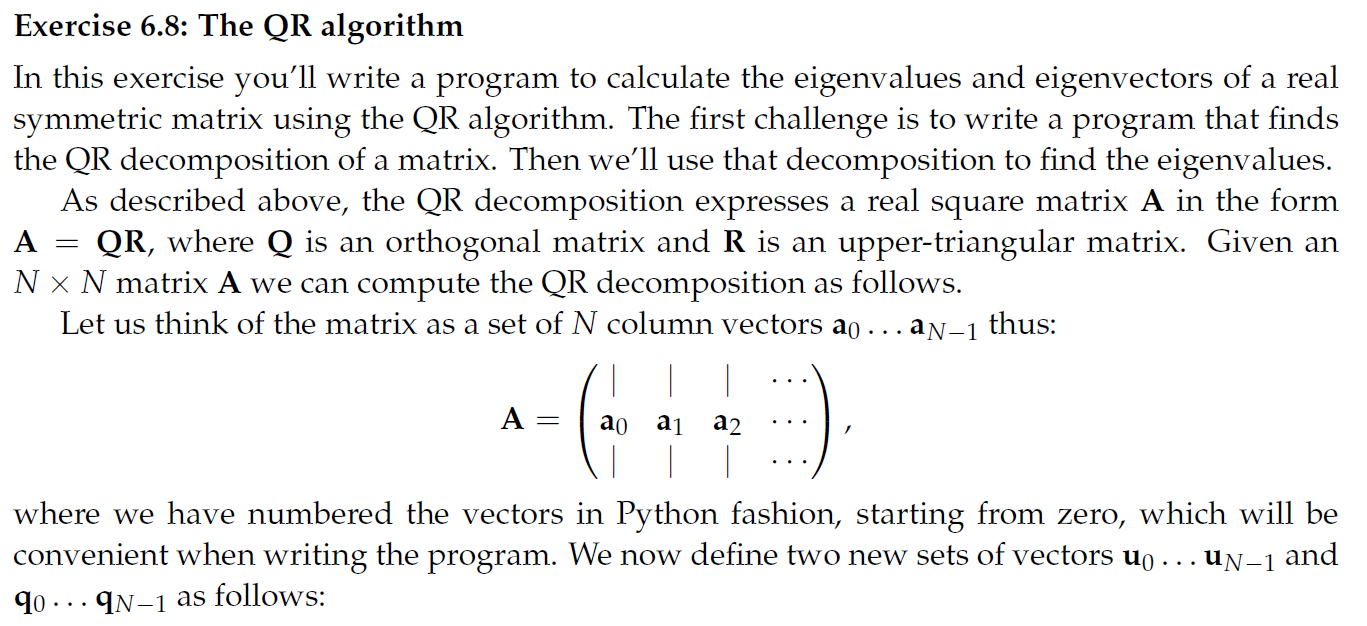

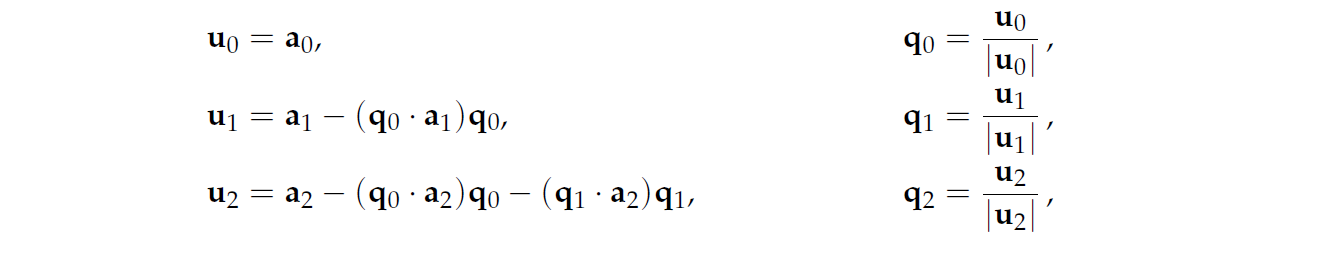

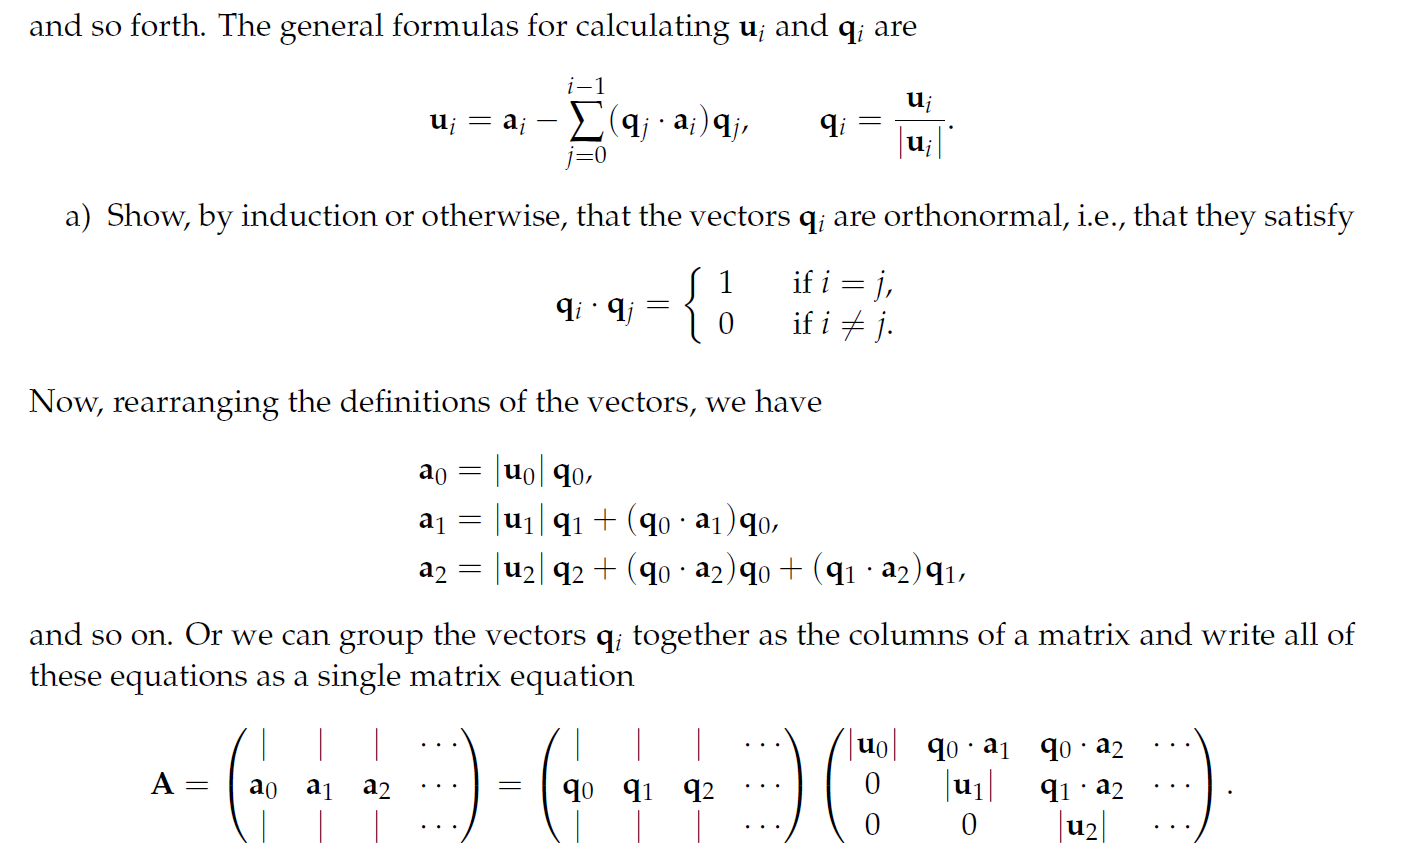

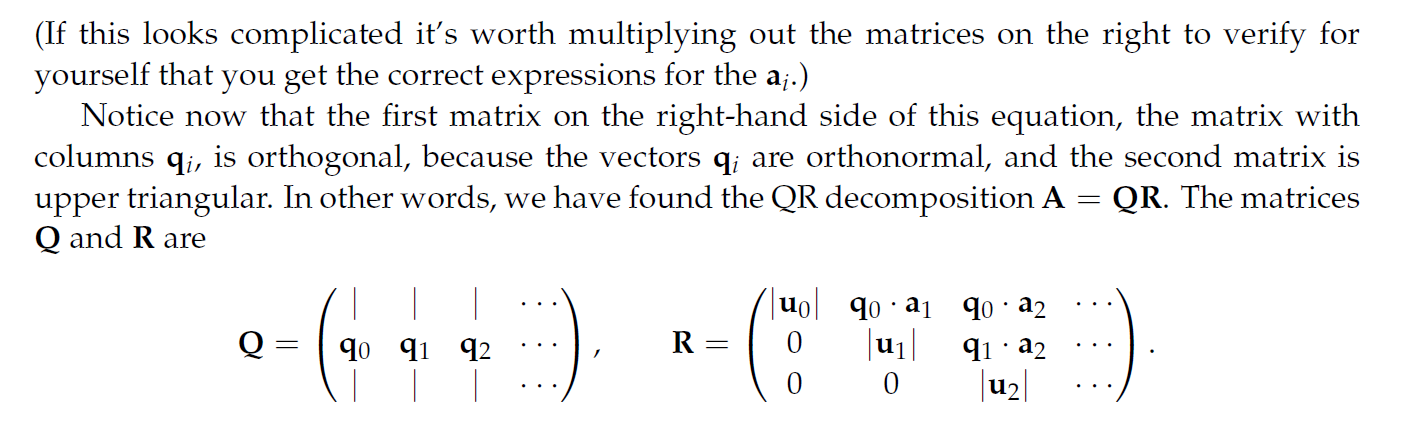

### How to solve nonlinear equations

The Gaussian elimination and LU decomposition are methods to solve systems of linear equations. But what about nonlinear equations? In some cases there are no analytical solutions to these equations so we have to rely on numerical techniques.

In this section we will learn four different methods we can use to solve nonlinear equations.

* Relaxation method (Exercise 6.10)
* Binary search (Exercise 6.13)
* Newton's method (Exercise (6.16)
* Golden ratio (Exercise 6.18)


**Relaxation method** - 

We start with the relaxtion method.
The nonlinear equation:

$
x=2-e^{-x}
$

has no analytic solution. We can't just solve this equation for x. However we can approximate the true solution using what's called the *relaxation method*. 

To see this, let's rewrite this as:

$
x=f(x), 
$

where $f(x)=2-e^{-x}$, then plot $f(x)$ vs. $x$. 


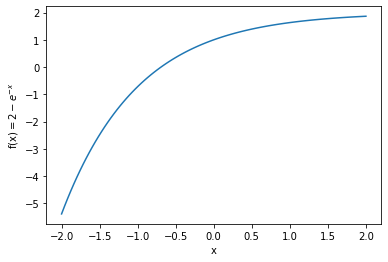

In [17]:
# plot nonlinear function x=2-exp(-x)

import numpy as np
import matplotlib.pyplot as plt


# define function
def f(x):
    return 2-np.exp(-x)

xvalues = np.linspace(-2,2,100)
yvalues = f(xvalues)

plt.plot(xvalues,yvalues)
plt.xlabel("x")
plt.ylabel(r"f(x)$=2-e^{-x}$")
plt.show()


A solution to this equation is when $x$ = $f(x)$. From the graph we see this is maybe around 1. Let's test to see if 1 is a solution 

In [18]:
# test if 1 is a solution

x=1

print(f"x={x}  f(x)={f(x)}")

x=1  f(x)=1.6321205588285577


Nope. The fact that $f(x) > x$ tells us that the true solution is larger than 1. In fact, let's just put $f(x)$ back into the equation.

In [19]:
# second iteration

x=1.6321205588285577

print(f"x={x}  f(x)={f(x)}")

x=1.6321205588285577  f(x)=1.8044854658474119


Nope, but we're getting closer. Let's again put f(x) back into the equation. 

In [20]:
# third iteration

x=1.8044854658474119

print(f"x={x}  f(x)={f(x)}")

x=1.8044854658474119  f(x)=1.8354408939220457


Getting closer but not quite there. Instead of manually iterating through choices, let's code this so the computer does the iterating for us.

We will again make an initial of guess at $x=1$ and perform 10 iterations. 

In [21]:
# iterative approach to finding the true solution.

# repeat the definition of the function here for convenience
def f(x):
    return 2-np.exp(-x)


# number of iterations
N = 10

# initial guess
x = 1

print(f"{'x':^20}{'f(x)':^20}{'|f(x)-x|':^20}")
for i in range(N):
    x = f(x)
    print(f"{x:>15} {f(x):>15} {abs(f(x)-x):>15}")

         x                  f(x)              |f(x)-x|      
1.6321205588285577 1.8044854658474119 0.1723649070188542
1.8044854658474119 1.8354408939220457 0.030955428074633806
1.8354408939220457 1.8404568553435368 0.0050159614214910775
1.8404568553435368 1.841255113911434 0.0007982585678971699
1.841255113911434 1.8413817828128696 0.0001266689014356448
1.8413817828128696 1.8414018735357267 2.0090722857135646e-05
1.8414018735357267 1.8414050598547234 3.1863189966507832e-06
1.8414050598547234 1.8414055651879888 5.05333265454766e-07
1.8414055651879888 1.8414056453310121 8.014302332881584e-08
1.8414056453310121 1.8414056580412428 1.2710230645751608e-08


You can see with only 10 iterations we're getting pretty close to the true solution. How many iterations does it take to get down to numerical error?

Let's use a while loop to test the difference until we hit this target.

In [22]:
# iterative approach to finding the true solution.

# repeat the definition of the function here for convenience
def f(x):
    return 2-np.exp(-x)


target = 1e-16

# initial guess
x = 1
i=1

print(f"{'i':^4}{'x':^20}{'f(x)':^20}{'|f(x)-x|':^20}")
while abs(f(x)-x) > target:
    print(f"{i:^4} {x:^20} {f(x):^20} {abs(f(x)-x):^20}")
    x = f(x)
    i += 1
    
solution = x

 i           x                  f(x)              |f(x)-x|      
 1            1            1.6321205588285577   0.6321205588285577 
 2    1.6321205588285577   1.8044854658474119   0.1723649070188542 
 3    1.8044854658474119   1.8354408939220457  0.030955428074633806
 4    1.8354408939220457   1.8404568553435368  0.0050159614214910775
 5    1.8404568553435368   1.841255113911434   0.0007982585678971699
 6    1.841255113911434    1.8413817828128696  0.0001266689014356448
 7    1.8413817828128696   1.8414018735357267  2.0090722857135646e-05
 8    1.8414018735357267   1.8414050598547234  3.1863189966507832e-06
 9    1.8414050598547234   1.8414055651879888  5.05333265454766e-07
 10   1.8414055651879888   1.8414056453310121  8.014302332881584e-08
 11   1.8414056453310121   1.8414056580412428  1.2710230645751608e-08
 12   1.8414056580412428   1.8414056600570134  2.0157706615009374e-09
 13   1.8414056600570134   1.841405660376703   3.1968960811923353e-10
 14   1.841405660376703    1.84140566

So we see we reach the true solution to within numerical precision with about 20 iterations. Pretty good. This technique of iteration is called the *relaxation method*, where you use the value of the function as the next input into the function until the function converges to a fixed value. That will be the solution.



For good measure we will plot the solution:

(-2, 2.5)

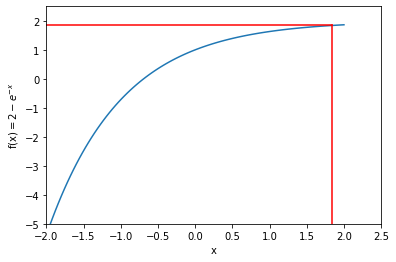

In [23]:
# plot nonlinear function x=2-exp(-x) and its solution

import numpy as np
import matplotlib.pyplot as plt


# define function
def f(x):
    return 2-np.exp(-x)

xvalues = np.linspace(-2,2,100)
yvalues = f(xvalues)

plt.plot(xvalues,yvalues)
plt.plot([solution, solution], [f(-5),f(solution)], 'r-')
plt.plot([-2,solution], [f(solution), f(solution)], 'r-')
plt.xlabel("x")
plt.ylabel(r"f(x)$=2-e^{-x}$")
plt.ylim(-5,2.5)
plt.xlim(-2,2.5)

In this example our initial guess was fairly close to the solution. But what if we don't know in advance what the approximate solution is? 

Let's see how well the relaxation method converges on a solution if our initial guess is far from the solution. 

We will repeat the above example but with an initial guess of 100. 

In [24]:
# initial guess
x = 100
i=1

print(f"{'i':^4}{'x':^20}{'f(x)':^20}{'|f(x)-x|':^20}")
while abs(f(x)-x) > target:
    print(f"{i:^4} {x:^20} {f(x):^20} {abs(f(x)-x):^20}")
    x = f(x)
    i += 1

 i           x                  f(x)              |f(x)-x|      
 1           100                  2.0                  98.0        
 2           2.0           1.8646647167633872   0.1353352832366128 
 3    1.8646647167633872   1.8450518473052135  0.019612869458173643
 4    1.8450518473052135   1.8419828720850022  0.003068975220211323
 5    1.8419828720850022   1.8414971765224537  0.000485695562548516
 6    1.8414971765224537   1.8414201737059899  7.700281646383367e-05
 7    1.8414201737059899   1.8414079621425745  1.221156341535412e-05
 8    1.8414079621425745   1.8414060254740223  1.9366685521937654e-06
 9    1.8414060254740223   1.8414057183297619  3.071442604696273e-07
 10   1.8414057183297619   1.8414056696184309  4.8711330968842503e-08
 11   1.8414056696184309   1.8414056618930899  7.725341033548716e-09
 12   1.8414056618930899   1.8414056606678946  1.2251952785646836e-09
 13   1.8414056606678946   1.8414056604735856  1.9430901332384565e-10
 14   1.8414056604735856   1.8414056604

We see the method still converges on the solution, using about the same number of iterations. 

How about an initial guess on the other side of the solution?

Here we start with x=-1.

In [25]:
# initial guess
x = -1
i=1
print(f"{'i':^4}{'x':^20}{'f(x)':^20}{'|f(x)-x|':^20}")
while abs(f(x)-x) > target:
    print(f"{i:^4} {x:^20} {f(x):^20} {abs(f(x)-x):^20}")
    x = f(x)
    i += 1

 i           x                  f(x)              |f(x)-x|      
 1            -1          -0.7182818284590451   0.2817181715409549 
 2   -0.7182818284590451  -0.0509063726925012   0.6673754557665439 
 3   -0.0509063726925012   0.947775628263688    0.9986820009561892 
 4    0.947775628263688    1.612397763269514    0.6646221350058259 
 5    1.612397763269514    1.800591094959094   0.18819333168958008 
 6    1.800591094959094    1.834798790246516   0.03420769528742196 
 7    1.834798790246516    1.8403543792073163  0.005555588960800328
 8    1.8403543792073163   1.8412388455153157  0.0008844663079994319
 9    1.8412388455153157   1.8413792023278908  0.00014035681257507093
 10   1.8413792023278908   1.8414014642751155  2.2261947224766487e-05
 11   1.8414014642751155   1.8414049949480478  3.5306729322392982e-06
 12   1.8414049949480478   1.8414055548941508  5.599461030403319e-07
 13   1.8414055548941508   1.8414056436984676  8.880431678903733e-08
 14   1.8414056436984676   1.8414056577823

Still fine. You see with both x=-1 and x=100 that the intial guess pushed the estimated solution towards the true solution. 

Is this always the case? 

Let's try x=-2.

In [26]:
# initial guess
x = -2
i=1
print(f"{'i':^4}{'x':^20}{'f(x)':^20}{'|f(x)-x|':^20}")
while abs(f(x)-x) > target:
    print(f"{i:^4} {x:^20} {f(x):^20} {abs(f(x)-x):^20}")
    x = f(x)
    i += 1

 i           x                  f(x)              |f(x)-x|      
 1            -2           -5.38905609893065    3.3890560989306504 
 2    -5.38905609893065   -216.99657686275216   211.60752076382153 
 3   -216.99657686275216  -1.7394659160525732e+94 1.7394659160525732e+94
 4   -1.7394659160525732e+94         -inf                 inf         


C:\Users\cbuten\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Interesting. What's happening for $x=-2$? We quickly diverge from the solution to the point where the difference between $x$ and $f(x)$ becomes infinite, with only 4 iterations! Clearly $f(x)$ did not converge to a fixed value. 

So why did the iterative process blow up at $x=-2$ pushing $x$ to exponentially large negative numbers, but converged on a solution for $x=-1$?


Did you guess that we'll need use a Taylor series expansion to find out?

Good!

To find out the behavior of the relaxation method around the solution, we expand f(x) about the solution, call it $x^*$.

$
f(x) = f(x^*) + f'(x^*)(x-x^*) + \text{higher order terms which we ignore}
$

Since $f(x^*)=x^*$, we can write this as:

$
f(x) = x^* + f'(x^*)(x-x^*)  
$

After an iteration of the relaxation method, what we get out --- call it $x'$ ---- is f(x), that is the function evaluated at the previous value of $x$, so:

$
x' = f(x) = x^* + f'(x^*)(x-x^*)  
$

And rearranging terms:

$
\underbrace{x' - x^*}_{\text{error in current estimate}} =  f'(x^*)\underbrace{(x-x^*)}_{\text{error in previous estimate}}
$

This now allows us to compare how close the current iteration $𝑥′$ is to the solution, compared to the previous iteration $𝑥$. 

In order for the relaxation method to converge on the solution, we want each iteration to be closer to the solution than the previous solution. 

But this result tells us it depends on the derivative of $f(x)$ evaluated at $𝑥^∗$. If $|f'(x^*)| <1$ then each iteration will bring us closer to the solution. However if  $|f'(x^*)| > 1$ then each iteration will bring us farther from it.

Let's calculate $f'(x^*)$ for our function.

$
f(x) = 2-e^{-x}
$

$
f'(x) = e^{-x}
$

Using the relaxation method above we found the solution is $x^* \sim 1.8414$, and

$
f'(1.8414) = 0.16
$

So, this result means that the relaxation method will converge to the solution for, at least choices of $x$ near the solution (since we did the expansion of $f(x)$ around $x^*$). So this explains why we could get the true solution when we started with an initial guess of $x=1$.

This is a kind of a minimum condition that must be met for the relaxation method to work. 

Let's see if the relaxation method converges for a function with a derivative greater than 1 at the solution. In this case, let's just choose a linear function of slope 2:

$
f(x) = 2x-2
$

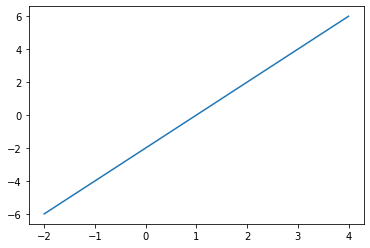

In [27]:
# try relaxation method on a linear function with derivative > 1 at solution

import numpy as np
import matplotlib.pyplot as plt


# define function
def f(x):
    return 2*x-2

# plot function
xvalues = np.linspace(-2,4,100)
yvalues = f(xvalues)
plt.plot(xvalues,yvalues)

In [29]:
# initial guess
x = 1
i=1
print(f"{'i':^4}{'x':^20}{'f(x)':^20}{'|f(x)-x|':^20}")
while (abs(f(x)-x) > target) and i<100:
    print(f"{i:^4} {x:^20} {f(x):^20} {abs(f(x)-x):^20}")
    x = f(x)
    i += 1  

 i           x                  f(x)              |f(x)-x|      
 1            1                    0                    1          
 2            0                    -2                   2          
 3            -2                   -6                   4          
 4            -6                  -14                   8          
 5           -14                  -30                   16         
 6           -30                  -62                   32         
 7           -62                  -126                  64         
 8           -126                 -254                 128         
 9           -254                 -510                 256         
 10          -510                -1022                 512         
 11         -1022                -2046                 1024        
 12         -2046                -4094                 2048        
 13         -4094                -8190                 4096        
 14         -8190                -16382            

Nope that doesn't converge. You can see the estimate diverge and blow up. How about if the slope is less than 1. Give it a try.

But this doesn't explain why the relaxation method converged at $x=-1$, but blew up at $x=-2$, in our previous function.

We can do a Taylor's expansion about $x=-1$ and $x=-2$.

Doing so, we see the first iteration using $x=-1$ moves $x'$ towards the solution. But using $x=-2$, the first iteration moves $x'$ away from the solution. Thus an initial guess of $x=-1$ will cause the relaxation method to converge on the solution, but a guess of $x=-2$ will not converge. 

So the relaxation method is not guaranteed to converge even if the derivative is less than 1 at the solution. It also depends on your initial guess. It is good to know approximately what the solution is. Graphing your function first often helps.

### Inverting the function 



Let's test the relaxation method on the equation $x=e^{1-x^2}$. By inspection we see the solution is $x=1$, but let's see if the relaxation method converges on the solution for values close to 1.

First we'll  plot it:

Text(0, 0.5, 'f(x)$=e^{1-x^2}$')

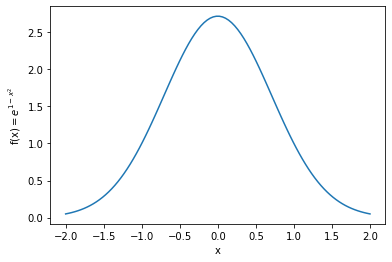

In [30]:
# plot nonlinear function x=exp(1-x^2)

import numpy as np
import matplotlib.pyplot as plt


# define function
def f(x):
    return np.exp(1-x**2)

xvalues = np.linspace(-2,2,100)
yvalues = f(xvalues)

plt.plot(xvalues,yvalues)
plt.xlabel("x")
plt.ylabel(r"f(x)$=e^{1-x^2}$")


Let's test x=0.75:

In [32]:
# relaxation method for x=exp(1-x^2)

# define function
def f(x):
    return np.exp(1-x**2)

x = 0.75
i = 0
epsilon = 1e-8
error = 999.
while (error > epsilon) and i<100:
    i += 1
    x = f(x)
    error = abs(f(x)-x)
    print("i={} x={} error={}".format(i, x, error))

i=1 x=1.5488302986341331 error=1.301955829572898
i=2 x=0.24687446906123517 error=2.3106837855241564
i=3 x=2.5575582545853917 error=2.5536360611255775
i=4 x=0.003922193459814063 error=2.714317818356365
i=5 x=2.7182400118161794 error=2.7165597888255175
i=6 x=0.0016802229906617073 error=2.7165939313637795
i=7 x=2.7182741543544413 error=2.7165942432117673
i=8 x=0.0016799111426738062 error=2.7165942460601133
i=9 x=2.7182741572027873 error=2.716594246086127
i=10 x=0.001679911116660096 error=2.7165942460863652
i=11 x=2.7182741572030253 error=2.7165942460863675
i=12 x=0.0016799111166579221 error=2.7165942460863675
i=13 x=2.7182741572030253 error=2.7165942460863675
i=14 x=0.0016799111166579221 error=2.7165942460863675
i=15 x=2.7182741572030253 error=2.7165942460863675
i=16 x=0.0016799111166579221 error=2.7165942460863675
i=17 x=2.7182741572030253 error=2.7165942460863675
i=18 x=0.0016799111166579221 error=2.7165942460863675
i=19 x=2.7182741572030253 error=2.7165942460863675
i=20 x=0.00167991111

We see that for even values very close to the solution, the relaxation method doesn't find the correct answer.

Let's see what the value of the first derivative is at the solution $x=1$.

$
f'(x) = -2xe^{1-x^2}
$



$
f'(1) = -2
$

Since the absolute value of the derivative is greater than 1, the solution will not converge for values close to the solution.

In this case it is sometimes possible to cast the equation in a different form, and try the relaxation method on the new form of the equation. 



For example if we take the log of each side of the equation we get:

$
\log{x} = 1-x^2
$

and then invert the equation:

$
x = \sqrt{1-\log{x}}
$

Let's try the relaxation method on this form:

In [33]:
# relaxation method for x=exp(1-x^2)

# define function
def f(x):
    return np.sqrt(1-np.log(x))  

x = 0.75
i = 0
epsilon = 1e-8
error = 999.
while error > epsilon:
    i += 1
    x = f(x)
    error = abs(f(x)-x)
    print("i={} x={} error={}".format(i, x, error))

i=1 x=1.1347607996629865 error=0.20010678855889186
i=2 x=0.9346540111040946 error=0.09858306709995257
i=3 x=1.0332370782040472 error=0.049721276785042456
i=4 x=0.9835158014190047 error=0.02476073543264723
i=5 x=1.008276536851652 error=0.012406301398756314
i=6 x=0.9958702354528957 error=0.006196786045826297
i=7 x=1.002067021498722 error=0.0030999990946110056
i=8 x=0.998967022404111 error=0.0015495998890626694
i=9 x=1.0005166222931736 error=0.0007749000917947058
i=10 x=0.9997417222013789 error=0.00038742503815436535
i=11 x=1.0001291472395333 error=0.0001937187746481328
i=12 x=0.9999354284648851 error=9.685782388579867e-05
i=13 x=1.000032286288771 error=4.842930285942071e-05
i=14 x=0.9999838569859115 error=2.4214553707824216e-05
i=15 x=1.0000080715396193 error=1.2107301285313454e-05
i=16 x=0.999995964238334 error=6.053644534986802e-06
i=17 x=1.000002017882869 error=3.026823794494149e-06
i=18 x=0.9999989910590745 error=1.5134115154413763e-06
i=19 x=1.00000050447059 error=7.567058531998683e

Now the relaxation method does converge on the solution. Let's calculate the derivative of this new form of the equation at the solution.

$
f'(x) = - \frac{\sqrt{1-\log{x}}}{2x}
$

and

$
f'(1) = -0.5
$

So now the derivative is less than one.

In general if we have an equation:

$
x=f(x)
$

and 

$
f'(x^*)>1
$

then if we invert the equation to get

$
x=f^{-1}(x)
$

like we did above,

then 

$
f'^{-1}(x^*) < 1
$

so the relaxation method will work.

The lesson is, if your equation doesn't converge because $f'(x^*)>1$, invert it and the new equation will.

You can not always solve a nonlinear equation with the relaxation method, but it works for many cases and many more where the equation can be easily transformed or inverted. 



### Error estimate of the relaxation method

We can get an estimate of the error on each iteration of $x$ by using the Taylor series expansion of $f(x)$ around the true solution $x^*$ that we used before. For convenience I repeat the expansion here:

$
x'-x*=(x-x^*)f'(x^*)
$

where $x'$ is the value of $f(x)$ after an iteration of the relaxation method.

We define errors $\epsilon$ and $\epsilon'$ as;

$
x^* = x+\epsilon
$

and

$
x^* = x'+\epsilon'
$

With these we see:

$
\underbrace{x'-x*}_{-\epsilon'} =\underbrace{(x-x^*)}_{-\epsilon} f'(x^*)
$

and from this:

$
\epsilon=\frac{\epsilon'}{f'(x^*)}.
$

Setting the two equations above equal:

$
x+\epsilon = x'+\epsilon'
$

and substituting for $\epsilon$, we find 

$
\epsilon'=\frac{x-x'}{1-1/f'(x^*)}
$

and since $f'(x^*) \sim f'(x)$ when $x$ is near the solution $x^*$,

$
\epsilon' \sim \frac{x-x'}{1-1/f'(x)} 
$

**This is the error on estimate $x'$.**

This says we can calculate the error using the current estimate of the solution, $x'$ and the iteration before, $x$, along with the evaluation of the derivative at $x$. These are all values we know. 

Let's go ahead and calculate the error using our previous example.

In [34]:
# relaxation method and error

# define the function 
def f(x):
    return 2-np.exp(-x)

# define the function derivative
def fp(x):
    return -np.exp(-x)


# number of iterations
N = 20

# initial guess
x = 1
xp = x
for i in range(N):
    x = f(x)
    error = abs( (xp-x)/(1-1/fp(xp)))
    xp = x
    print("x={}  error={}".format(x,error))

x=1.6321205588285577  error=0.17000340156854793
x=1.8044854658474119  error=0.02818856947141406
x=1.8354408939220457  error=0.004374185514188201
x=1.8404568553435368  error=0.0006901530679113132
x=1.841255113911434  error=0.00010935924460284752
x=1.8413817828128696  error=1.7341342489464088e-05
x=1.8414018735357267  error=2.750177936312174e-06
x=1.8414050598547234  error=4.361611233121949e-07
x=1.8414055651879888  error=6.917264680242517e-08
x=1.8414056453310121  error=1.0970389260774984e-08
x=1.8414056580412428  error=1.7398416273974543e-09
x=1.8414056600570134  error=2.75929034447821e-10
x=1.841405660376703  error=4.376075434701779e-11
x=1.841405660427404  error=6.940212954836635e-12
x=1.841405660435445  error=1.1006798360427826e-12
x=1.8414056604367204  error=1.7458661194007302e-13
x=1.8414056604369224  error=2.76590906798906e-14
x=1.8414056604369546  error=4.407217745696085e-15
x=1.8414056604369597  error=6.990759182828077e-16
x=1.8414056604369604  error=9.118381542819191e-17


And of course we can use a while loop to iterate until we reach the target accuracy.

### Relaxation method for two or more variables

We can also use the relaxation method to solve systems of equations with two or more variables.

Consider two equations of the form:

$
x = f(x,y)
$

and 
$
y = g(x,y)
$

We can again start with an initial guess of the solution x,y, evaluate the functions $f(x,y)$ and $g(x,y)$ at these positions, get new estimates of x,y and continue iterating until the estimates converge to the solution (assuming they do converge).

Just as in the single variable case, there is no guarantee that the solutions will converge. Again, it's possible to reformulate each equation to find a form that does converge. 

For example, you could try inverting the first equation to get $x=f^{-1}(x,y)$ and the second for $y=g^{-1}(x,y)$, or perhaps you could solve the first equation for $y$ and the second for $x$. Again we want to find a form where the derivatives (in this case the partial derivatives) are less than 1 near the solution. This what you will need to do in Exercise 6.12. 